1. Imports & Configuration

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# Paths
RAW_DIR = os.path.join("..", "data", "raw")

2. Data Loading

In [22]:
# Load a Single Ticker to sanity check
sample = pd.read_csv(os.path.join(RAW_DIR, "AAPL.csv"), parse_dates=["Date"], index_col = "Date")
sample.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,24.778681,24.789804,23.879983,24.320435,212818400
2015-01-05,24.089082,24.169164,23.448427,23.635284,257142000
2015-01-06,23.699794,23.897774,23.274914,23.637508,263188400
2015-01-07,23.846612,24.069062,23.735387,23.968960,160423600
2015-01-08,24.298189,24.947741,24.180289,24.889904,237458000


In [9]:
# Load Multiple Tickers for batch analysis
files = glob(os.path.join(RAW_DIR, "*.csv"))[:10]
dfs = {os.path.basename(f).split(".")[0]: pd.read_csv(f, parse_dates=["Date"], index_col="Date") for f in files}

3. Summary Statistics

In [ ]:
# For each DataFrame, call describe() on the "Close" column
sample["Close"].describe()

count    2601.000000
mean       98.381916
std        68.582434
min        20.674530
25%        35.906532
50%        71.020004
75%       157.484283
max       258.735504
Name: Close, dtype: float64

In [11]:
# Build a table of mean, std, min, max for batch
stats = {sym: df["Close"].describe()[["mean", "std", "min", "max"]] for sym, df in dfs.items()}
pd.DataFrame(stats).T

,mean,std,min,max
A,90.455996,40.084865,30.908300,174.784470
AAPL,98.381916,68.582434,20.674530,258.735504
ABBV,91.584598,46.546318,32.355080,214.676071
ABNB,139.143570,25.384715,82.489998,216.839996
ABT,77.793012,31.111789,30.562088,139.573471
ACGL,43.104443,23.680676,18.374529,109.220207
ACN,204.992664,92.950970,70.583702,396.284912
ADBE,322.884925,174.149019,69.989998,688.369995
ADI,117.804297,55.102905,40.563263,242.763779
ADM,47.497712,16.756639,23.264565,91.116249


4. Time-Series Plots

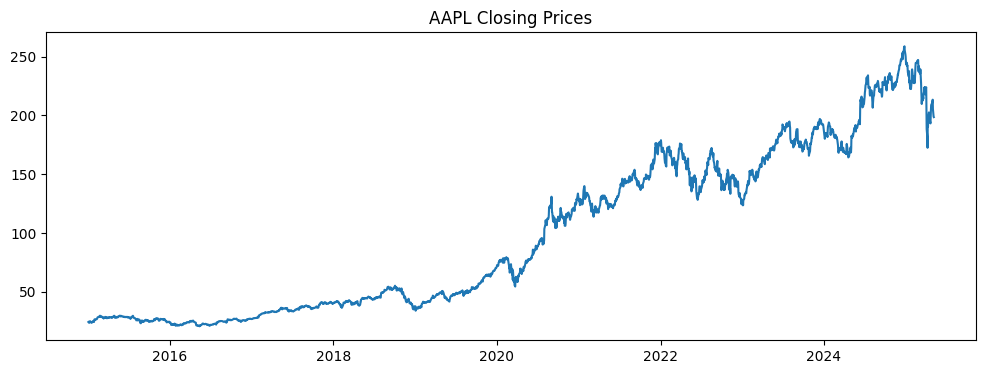

In [12]:
# Single Ticker Plot
plt.figure(figsize=(12, 4))
plt.plot(sample["Close"])
plt.title("AAPL Closing Prices");
plt.show()

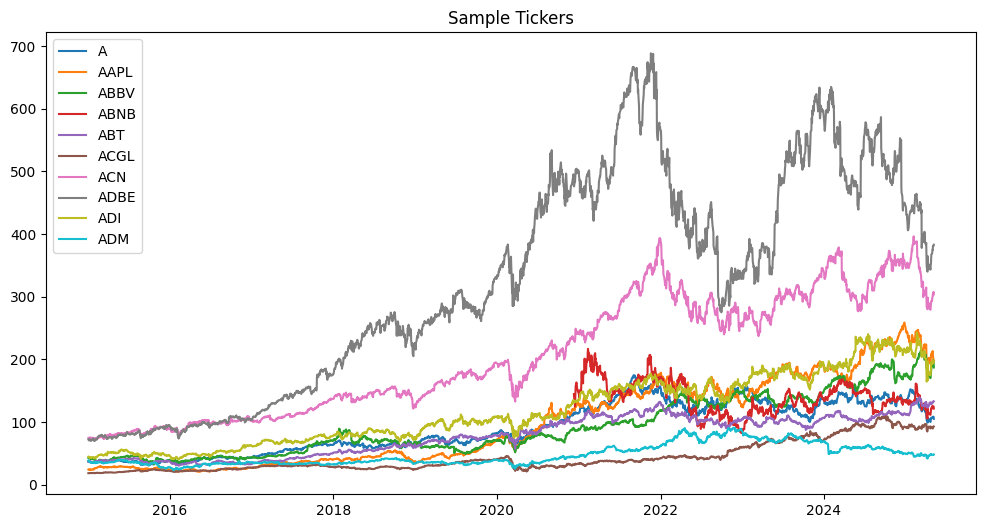

In [13]:
# Overlay Multiple Tickers
plt.figure(figsize=(12, 6))
for sym, df in dfs.items():
    plt.plot(df["Close"], label=sym)
plt.legend();
plt.title("Sample Tickers");
plt.show() 

5. Calculate Daily Returns

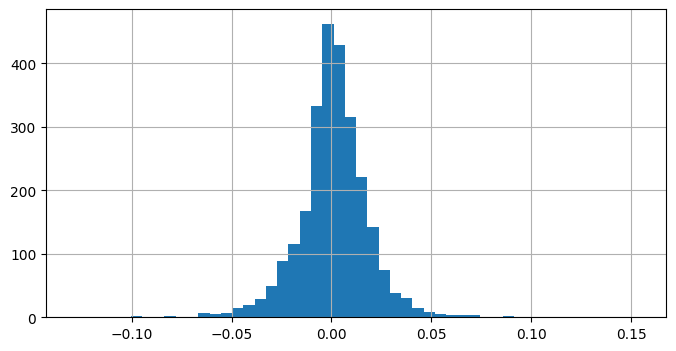

In [14]:
# Add a Returns Column
sample["Returns"] = sample["Close"].pct_change()
sample["Returns"].dropna().hist(bins=50, figsize=(8, 4));

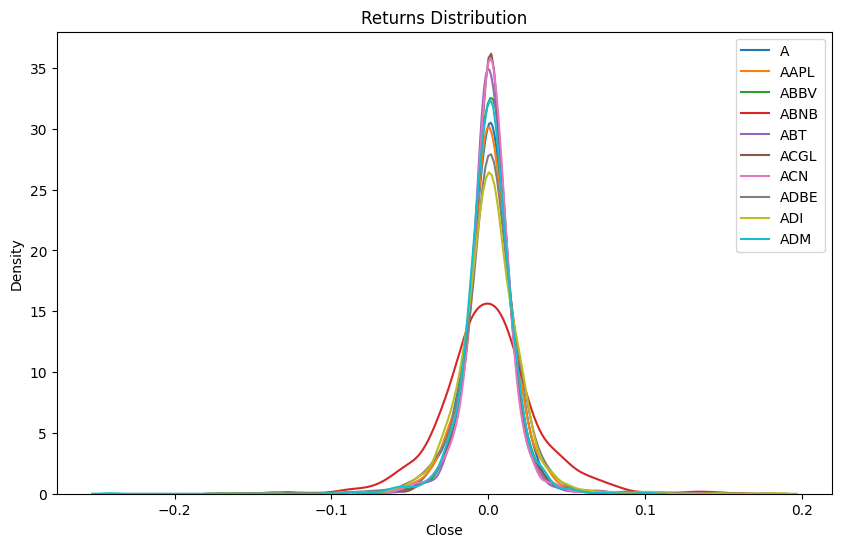

In [16]:
# Batch Distribution of Returns
plt.figure(figsize=(10, 6))
for sym, df in dfs.items():
    sns.kdeplot(df["Close"].pct_change().dropna(), label=sym)
plt.legend();
plt.title("Returns Distribution");
plt.show()

6. Correlation Heatmap

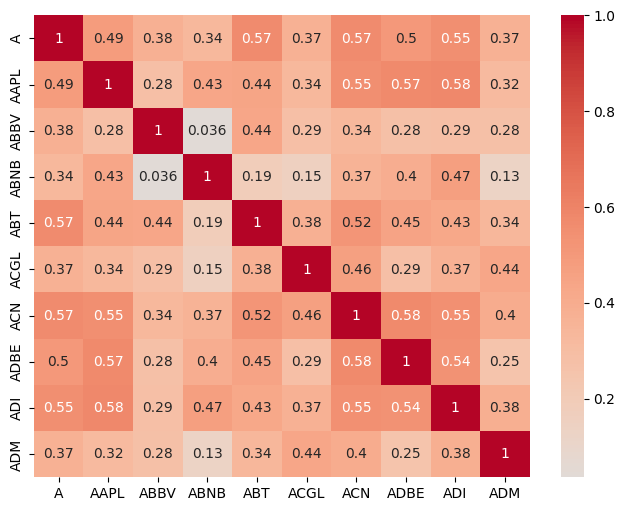

In [17]:
# Build a DataFrame of returns for your batch and plot correlations:
ret_df = pd.concat([df["Close"].pct_change().rename(sym) for sym, df in dfs.items()], axis=1)
corr = ret_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0);